<h1 style="color: #4CAF50;">📚 <strong>Book Recommendation System</strong> 📚</h1>

**Your Personal Book Finder**

---


Welcome to my **Book Recommendation System** project! As someone who loves books, I know how hard it can be to find the right ones. 
You search for recommendations, but sometimes the books just don’t hit the mark. They either end up too basic, or maybe it’s not even your vibe. You’ve been there, right?<br>

I got tired of this guessing game, so I decided to build a system that works like Netflix or Spotify, but for books. 
Just like Netflix suggests movies based on what you’ve watched, and Spotify gives you songs based on what you’ve loved, this system will recommend books based on your reading preferences. Whether you’re into fiction, mystery, or self-help, it’ll find books you’ll actually enjoy. <br>

The goal? To make discovering books easier and more fun. So no more wasting time scrolling through endless lists of books that don’t match your taste. <br>

The next sections contains a **Exploratory Data Analysis (EDA)** to uncover key insights from the dataset.
Exploring trends in ratings, genres, formats, and more, all to better understand what books people are loving. </p>

---

In [2]:
# Install the necessary libraries
import pandas as pd
import numpy as np
import re
from collections import Counter
import ast
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# Load the data from file
df = pd.read_csv("C:/Users/acer/Desktop/personals/Book_Details.csv")

In [4]:
# Check the first few rows of the dataset
df.head()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","['652 pages, Paperback']","['First published July 16, 2005']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['652'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"['912 pages, Paperback']","['First published June 21, 2003']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['912'],"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"['309 pages, Hardcover']","['First published June 26, 1997']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['309'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","['435 pages, Mass Market Paperback']","['First published July 8, 1999']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['435'],"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"['734 pages, Paperback']","['First published July 8, 2000']",https://www.goodreads.com/author/show/1077326....,J.K. Rowling,['734'],"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [5]:
# Check the last few rows of the dataset
df.tail()

,Unnamed: 0,book_id,cover_image_uri,book_title,book_details,format,publication_info,authorlink,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
16220,16220,208877606,https://images-na.ssl-images-amazon.com/images...,Finistère,The 1920s. When wealthy American adolescent Ma...,"['316 pages, Paperback']","['First published January 1, 1951']",https://www.goodreads.com/author/show/151154.F...,Fritz Peters,['316'],"['Fiction', 'LGBT', 'Queer', 'Classics', 'Gay'...",129,22,3.77,"{'5': '36', '4': '41', '3': '41', '2': '8', '1..."
16221,16221,208877648,https://images-na.ssl-images-amazon.com/images...,The Descent,"Set in the 1950s, The Descent asks the questio...","['268 pages, Paperback']","['First published January 1, 1952']",https://www.goodreads.com/author/show/151154.F...,Fritz Peters,['268'],['Fiction'],4,0,4.75,"{'5': '3', '4': '1', '3': '0', '2': '0', '1': ..."
16222,16222,209251042,https://images-na.ssl-images-amazon.com/images...,FDR Unmasked: 73 Years of Medical Cover-ups Th...,THE HIDDEN ILLNESSES THAT SHAPED FDR’S LIFE AN...,"['316 pages, Paperback']","['Published February 27, 2024']",https://www.goodreads.com/author/show/2991326....,Steven Lomazow,['316'],"['Drama', 'Novels', 'Contemporary']",986,11,4.32,"{'5': '469', '4': '431', '3': '38', '2': '33',..."
16223,16223,209441121,https://images-na.ssl-images-amazon.com/images...,Code Yellow in Gretna Green,"In Gateway terminology, a ""Code Yellow"" signif...","['776 pages, Kindle Edition']","['Published March 28, 2024']",https://www.goodreads.com/author/show/22515164...,Linzi Day,['776'],"['Science Fiction Fantasy', 'Fantasy', 'Fictio...",1109,106,4.61,"{'5': '764', '4': '266', '3': '74', '2': '4', ..."
16224,16224,209607645,https://images-na.ssl-images-amazon.com/images...,Shadow's Siege,Shadow Island is under siege.Just a few short ...,"['254 pages, Kindle Edition']","['Published April 25, 2024']",https://www.goodreads.com/author/show/19007338...,Mary Stone,['254'],"['Drama', 'Novels', 'Crime', 'Thriller', 'Susp...",1271,37,4.64,"{'5': '914', '4': '277', '3': '70', '2': '5', ..."


In [6]:
# Get the shape of the dataset(number of rows and columns)
df.shape

(16225, 15)

- The dataset contains 16,255 rows and 15 columns, this means there are 15 features available for analysis across 16,255 observations.

In [7]:
# Get the basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16225 non-null  int64  
 1   book_id              16225 non-null  int64  
 2   cover_image_uri      16225 non-null  object 
 3   book_title           16225 non-null  object 
 4   book_details         16177 non-null  object 
 5   format               16225 non-null  object 
 6   publication_info     16225 non-null  object 
 7   authorlink           16225 non-null  object 
 8   author               16225 non-null  object 
 9   num_pages            16225 non-null  object 
 10  genres               16225 non-null  object 
 11  num_ratings          16225 non-null  int64  
 12  num_reviews          16225 non-null  int64  
 13  average_rating       16225 non-null  float64
 14  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(4), object(10)


- The dataset contains **16,255 entries** and **15 columns** with varying data types: 4 integer columns, 1 float columns and 10 object(string) columns. 
- Most columns have complete data, except for the book_details column, which has **16,177 non-null values**, indicating a few missing entries.

In [8]:
# Check for missing values in each columns
df.isnull().sum()

Unnamed: 0              0
book_id                 0
cover_image_uri         0
book_title              0
book_details           48
format                  0
publication_info        0
authorlink              0
author                  0
num_pages               0
genres                  0
num_ratings             0
num_reviews             0
average_rating          0
rating_distribution     0
dtype: int64

- This further shows that the **book_details** column has 48 missing entries out of 16,225, which is a verysmall percentage of the total data. 
- To avoid unnecessary complexity during analysis, we will drop those rows since it isn't significant enough to impact our results.

In [9]:
# Drop the column Unnamed because it's unnecesary
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16225 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              16225 non-null  int64  
 1   cover_image_uri      16225 non-null  object 
 2   book_title           16225 non-null  object 
 3   book_details         16177 non-null  object 
 4   format               16225 non-null  object 
 5   publication_info     16225 non-null  object 
 6   authorlink           16225 non-null  object 
 7   author               16225 non-null  object 
 8   num_pages            16225 non-null  object 
 9   genres               16225 non-null  object 
 10  num_ratings          16225 non-null  int64  
 11  num_reviews          16225 non-null  int64  
 12  average_rating       16225 non-null  float64
 13  rating_distribution  16225 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.7+ MB


In [11]:
# Drop rows with missing valuesdf
df.dropna(inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16177 entries, 0 to 16224
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              16177 non-null  int64  
 1   cover_image_uri      16177 non-null  object 
 2   book_title           16177 non-null  object 
 3   book_details         16177 non-null  object 
 4   format               16177 non-null  object 
 5   publication_info     16177 non-null  object 
 6   authorlink           16177 non-null  object 
 7   author               16177 non-null  object 
 8   num_pages            16177 non-null  object 
 9   genres               16177 non-null  object 
 10  num_ratings          16177 non-null  int64  
 11  num_reviews          16177 non-null  int64  
 12  average_rating       16177 non-null  float64
 13  rating_distribution  16177 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.9+ MB


In [13]:
# Check the number of unique values in each column
df.nunique()

book_id                16109
cover_image_uri        16081
book_title             15443
book_details           16018
format                  3097
publication_info        5352
authorlink              7583
author                  7583
num_pages               1082
genres                 13757
num_ratings            13082
num_reviews             6437
average_rating           264
rating_distribution    16060
dtype: int64

**Observation:**
 - The column book_id has a near-complete set of unique values, with only 116 missing, suggesting that each book has a unique identifier.

 - The cover_image_uri, book_title, and book_details columns show missing values, but still have relatively high completeness, with only a few hundred entries missing.

 - format has a significant amount of missing data, with over 12,000 missing values, which suggests that this column may require additional attention (perhaps it’s optional or inconsistently filled).

 - Both publication_info and authorlink have substantial missing values, with over 5,000 missing in each, indicating potential gaps in metadata collection.

 - The num_pages column is missing over 10,000 values, which could be due to books not having page numbers listed or the data being unavailable.

 - The genres column is missing over 1,000 values, which may indicate incomplete genre information for some books.

 - The num_ratings and num_reviews columns are mostly filled, with only around 1,000 missing values each, suggesting that most books have received some ratings or reviews.

 - average_rating has very few missing values (264), indicating that most books have a recorded average rating.
 
 - The rating_distribution column has 165 missing values, suggesting that most books have rating distributions available.

In [14]:
# Check for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

- The result shows that there are no duplicate rows in the dataset.

In [15]:
# Removing 'authorlink' and 'publication_info' columns because they are not needed.
df.drop(columns = ['authorlink', 'publication_info'], inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16177 entries, 0 to 16224
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              16177 non-null  int64  
 1   cover_image_uri      16177 non-null  object 
 2   book_title           16177 non-null  object 
 3   book_details         16177 non-null  object 
 4   format               16177 non-null  object 
 5   author               16177 non-null  object 
 6   num_pages            16177 non-null  object 
 7   genres               16177 non-null  object 
 8   num_ratings          16177 non-null  int64  
 9   num_reviews          16177 non-null  int64  
 10  average_rating       16177 non-null  float64
 11  rating_distribution  16177 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.6+ MB


In [17]:
# Clean column with square brackets and quotation marks
columns = ['format', 'num_pages']
for col in columns:
    df[col] = df[col].str.strip("[]").str.replace("'", "").str.replace('"', '')
    
df.head()

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback",J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback",J.K. Rowling,912,"['Young Adult', 'Fiction', 'Magic', 'Childrens...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"309 pages, Hardcover",J.K. Rowling,309,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","435 pages, Mass Market Paperback",J.K. Rowling,435,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"734 pages, Paperback",J.K. Rowling,734,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [18]:
# Convert the genre column to a list format to a comma-separated string
df['genres'] = df['genres'].str.strip("[]").str.replace("'", "").str.replace('"', '')

df.head()

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_distribution
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback",J.K. Rowling,652,"Fantasy, Young Adult, Fiction, Magic, Children...",3292516,58398,4.58,"{'5': '2,244,154', '4': '775,028', '3': '219,8..."
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback",J.K. Rowling,912,"Young Adult, Fiction, Magic, Childrens, Audiob...",3401709,64300,4.50,"{'5': '2,178,760', '4': '856,178', '3': '293,2..."
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"309 pages, Hardcover",J.K. Rowling,309,"Fantasy, Fiction, Young Adult, Magic, Children...",10116247,163493,4.47,"{'5': '6,544,542', '4': '2,348,390', '3': '856..."
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","435 pages, Mass Market Paperback",J.K. Rowling,435,"Fantasy, Fiction, Young Adult, Magic, Children...",4215031,84959,4.58,"{'5': '2,892,322', '4': '970,190', '3': '287,7..."
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"734 pages, Paperback",J.K. Rowling,734,"Fantasy, Young Adult, Fiction, Magic, Children...",3718209,69961,4.57,"{'5': '2,500,070', '4': '899,496', '3': '259,7..."


In [19]:
# Convert the numerical columns to the appropriate data types

df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

# Fill NaN values with a default value
df['num_pages'].fillna(0, inplace=True)

# Convert to integer
df['num_pages'] = df['num_pages'].astype(int)

C:\Users\acer\AppData\Local\Temp\ipykernel_8236\3425554417.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_pages'].fillna(0, inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16177 entries, 0 to 16224
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book_id              16177 non-null  int64  
 1   cover_image_uri      16177 non-null  object 
 2   book_title           16177 non-null  object 
 3   book_details         16177 non-null  object 
 4   format               16177 non-null  object 
 5   author               16177 non-null  object 
 6   num_pages            16177 non-null  int64  
 7   genres               16177 non-null  object 
 8   num_ratings          16177 non-null  int64  
 9   num_reviews          16177 non-null  int64  
 10  average_rating       16177 non-null  float64
 11  rating_distribution  16177 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.6+ MB


In [21]:
# Step 1: Separate 'rating_distribution' dictionary into individual columns
df['rating_5'] = df['rating_distribution'].apply(lambda x: ast.literal_eval(x).get('5', 0))
df['rating_4'] = df['rating_distribution'].apply(lambda x: ast.literal_eval(x).get('4', 0))
df['rating_3'] = df['rating_distribution'].apply(lambda x: ast.literal_eval(x).get('3', 0))
df['rating_2'] = df['rating_distribution'].apply(lambda x: ast.literal_eval(x).get('2', 0))
df['rating_1'] = df['rating_distribution'].apply(lambda x: ast.literal_eval(x).get('1', 0))

In [22]:
# Step 2: Remove commas and convert the values to integers
df['rating_5'] = df['rating_5'].apply(lambda x: int(str(x).replace(',', '')))
df['rating_4'] = df['rating_4'].apply(lambda x: int(str(x).replace(',', '')))
df['rating_3'] = df['rating_3'].apply(lambda x: int(str(x).replace(',', '')))
df['rating_2'] = df['rating_2'].apply(lambda x: int(str(x).replace(',', '')))
df['rating_1'] = df['rating_1'].apply(lambda x: int(str(x).replace(',', '')))

# Step 3: Drop the original 'rating_distribution' column if no longer needed
df.drop('rating_distribution', axis=1, inplace=True)

In [23]:
df.head()

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...","652 pages, Paperback",J.K. Rowling,652,"Fantasy, Young Adult, Fiction, Magic, Children...",3292516,58398,4.58,2244154,775028,219864,35870,17600
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,"912 pages, Paperback",J.K. Rowling,912,"Young Adult, Fiction, Magic, Childrens, Audiob...",3401709,64300,4.50,2178760,856178,293293,51763,21715
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"309 pages, Hardcover",J.K. Rowling,309,"Fantasy, Fiction, Young Adult, Magic, Children...",10116247,163493,4.47,6544542,2348390,856996,194791,171528
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...","435 pages, Mass Market Paperback",J.K. Rowling,435,"Fantasy, Fiction, Young Adult, Magic, Children...",4215031,84959,4.58,2892322,970190,287733,40587,24199
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,"734 pages, Paperback",J.K. Rowling,734,"Fantasy, Young Adult, Fiction, Magic, Children...",3718209,69961,4.57,2500070,899496,259745,38301,20597


In [24]:
# Find the most common book formats

df['format'].value_counts()   

format
288 pages, Paperback     142
320 pages, Paperback     137
256 pages, Paperback     128
304 pages, Paperback     126
352 pages, Paperback     118
                        ... 
1204 pages, Paperback      1
1281 pages, Hardcover      1
982 pages, Hardcover       1
628 pages, Hardcover       1
652 pages, Paperback       1
Name: count, Length: 3097, dtype: int64

In [25]:
# See which authors are most frequent
df['author'].value_counts().head(10)

author
Stephen King       79
Danielle Steel     48
Agatha Christie    48
Sylvia Browne      43
Terry Pratchett    42
Rick Riordan       39
James Patterson    39
Sarah J. Maas      38
Neil Gaiman        36
Julie Mannino      34
Name: count, dtype: int64

- **Stephen King** dominates the dataset with **79 books**, showcasing his prolific contributions to literature. **Danielle Steel** and **Agatha Christie** follow with *48 books* each, reflecting their enduring popularity. Authors like **Sylvia Browne (43), Terry Pratchett (42), and Rick Riordan (39)** also stand out, highlighting their consistent impact in their respective genres. The list represents a mix of legendary and contemporary authors catering to diverse reader interests.

In [26]:
# Identify the most common genres

genres = df['genres'].apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genres for genre in sublist])
genre_counts.most_common(10)

[('Fiction', 11440),
 ('Fantasy', 5108),
 ('Romance', 3787),
 ('Young Adult', 3504),
 ('Classics', 3213),
 ('Nonfiction', 2754),
 ('Historical Fiction', 2724),
 ('Mystery', 2629),
 ('Contemporary', 2572),
 ('Novels', 2188)]

- The dataset shows Fiction as the most popular genre, appearing 11,440 times, far ahead of others. Fantasy follows with 5,108 occurrences, highlighting its appeal. Romance (3,787) and Young Adult (3,504) are also prominent, indicating a preference for emotional and coming-of-age stories.

- Classics (3,213) and Nonfiction (2,754) reflect an interest in timeless and educational content, while genres like Historical Fiction (2,724) and Mystery (2,629) show solid representation. Overall, the dataset caters to diverse tastes, with Fiction leading the pack.

In [27]:
# Identitfying the books with the highest number of ratings
df.sort_values(by='num_ratings', ascending=False).head(10)

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,"309 pages, Hardcover",J.K. Rowling,309,"Fantasy, Fiction, Young Adult, Magic, Children...",10116247,163493,4.47,6544542,2348390,856996,194791,171528
15097,42844155,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer’s Stone,An alternative cover for this ASIN can be foun...,"333 pages, Kindle Edition",J.K. Rowling,333,"Fantasy, Fiction, Young Adult, Magic, Children...",10113168,163418,4.47,6542689,2347552,856728,194729,171470
12409,12885649,https://images-na.ssl-images-amazon.com/images...,The Hunger Games,MAY THE ODDS BE EVER IN YOUR FAVOURWinning wil...,"458 pages, Paperback",Suzanne Collins,458,"Young Adult, Fiction, Fantasy, Science Fiction...",8719855,219534,4.34,4732413,2649670,995051,221079,121642
9549,2767052,https://images-na.ssl-images-amazon.com/images...,The Hunger Games,"Could you survive on your own in the wild, wit...","374 pages, Hardcover",Suzanne Collins,374,"Young Adult, Fiction, Fantasy, Science Fiction...",8717540,219444,4.34,4731120,2648943,994822,221034,121621
2572,41865,https://images-na.ssl-images-amazon.com/images...,Twilight,About three things I was absolutely positive.F...,"498 pages, Paperback",Stephenie Meyer,498,"Fantasy, Young Adult, Romance, Fiction, Vampir...",6610633,130873,3.65,2366987,1541787,1380321,680389,641149
224,2654,https://images-na.ssl-images-amazon.com/images...,To Kill a Mockingbird,"'Shoot all the bluejays you want, if you can h...","323 pages, Paperback",Harper Lee,323,"Classics, Fiction, Historical Fiction, School,...",6158672,118117,4.26,3186131,1836084,809656,213329,113472
225,2657,https://images-na.ssl-images-amazon.com/images...,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"323 pages, Paperback",Harper Lee,323,"Classics, Fiction, Historical Fiction, School,...",6158652,118118,4.26,3186120,1836079,809655,213326,113472
383,4671,https://images-na.ssl-images-amazon.com/images...,The Great Gatsby,"The Great Gatsby, F. Scott Fitzgerald's third ...","180 pages, Paperback",F. Scott Fitzgerald,180,"Classics, Fiction, School, Historical Fiction,...",5271406,106329,3.93,1865545,1784963,1131280,341583,148035
12263,11870085,https://images-na.ssl-images-amazon.com/images...,The Fault in Our Stars,Despite the tumor-shrinking medical miracle th...,"313 pages, Hardcover",John Green,313,"Young Adult, Fiction, Contemporary, Realistic ...",5166085,179341,4.14,2400698,1551651,849133,243030,121573
15126,43452513,https://images-na.ssl-images-amazon.com/images...,1984,Джорд Орвелл (1903–1950) – англійський письмен...,"312 pages, Hardcover",George Orwell,312,"Classics, Fiction, Science Fiction, Dystopia, ...",4637150,117603,4.19,2190740,1514982,659432,177096,94900


In [28]:
df.dtypes

book_id              int64
cover_image_uri     object
book_title          object
book_details        object
format              object
author              object
num_pages            int64
genres              object
num_ratings          int64
num_reviews          int64
average_rating     float64
rating_5             int64
rating_4             int64
rating_3             int64
rating_2             int64
rating_1             int64
dtype: object

In [29]:
# Check for duplicates based on 'book_title' and 'author'
duplicate_rows = df[df.duplicated(subset=['book_title', 'author'])]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 401


In [30]:
duplicate_rows

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
28,117,https://images-na.ssl-images-amazon.com/images...,Heretics of Dune,Book Five in the Magnificent Dune Chronicles—t...,"471 pages, Mass Market Paperback",Frank Herbert,471,"Science Fiction, Fiction, Fantasy, Science Fic...",83189,2835,3.87,25136,30143,21097,5511,1302
92,760,https://images-na.ssl-images-amazon.com/images...,Memories of My Melancholy Whores,Memories of My Melancholy Whores is Gabriel Ga...,"115 pages, Mass Market Paperback",Gabriel García Márquez,115,"Classics, Literature, Romance, Magical Realism...",87780,5773,3.59,16979,31190,28794,8317,2500
107,930,https://images-na.ssl-images-amazon.com/images...,Memoirs of a Geisha,"A literary sensation and runaway bestseller, t...","434 pages, Hardcover",Arthur Golden,434,"Fiction, Historical Fiction, Romance, Historic...",2006832,36164,4.15,867139,708082,328552,73132,29927
225,2657,https://images-na.ssl-images-amazon.com/images...,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,"323 pages, Paperback",Harper Lee,323,"Classics, Fiction, Historical Fiction, School,...",6158652,118118,4.26,3186120,1836079,809655,213326,113472
336,3979,https://images-na.ssl-images-amazon.com/images...,Song of Kali,"Calcutta: a monstrous city of immense slums, d...","311 pages, Paperback",Dan Simmons,311,"Horror, Fantasy, Fiction, Thriller, India, Mys...",14066,1171,3.61,2782,5189,4369,1316,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16117,126062562,https://images-na.ssl-images-amazon.com/images...,The Assassin's Blade,Celaena Sardothien is her kingdom’s most feare...,"451 pages, ebook",Sarah J. Maas,451,"Young Adult, Romance, Fiction, Young Adult Fan...",612463,56330,4.24,265858,242247,90673,10818,2867
16119,126845444,https://images-na.ssl-images-amazon.com/images...,"Triumph: Life on the Other Side of Trials, Tra...",Don’t let family history set the course for yo...,"215 pages, Kindle Edition",Gregory S. Works,215,"Self Help, Nonfiction, Biography, Psychology",7216,13,4.26,3202,3238,361,287,128
16127,136047798,https://dryofg8nmyqjw.cloudfront.net/images/no...,The Cheat Code,\nAfter the terrible encounters with the war h...,"322 pages, Kindle Edition",Misba,322,"Fantasy, Science Fiction Fantasy, Science Fict...",2661,924,4.59,1760,747,131,18,5
16148,158532086,https://images-na.ssl-images-amazon.com/images...,Down and Rising,The debut novel from award-winning filmmaker R...,"675 pages, Paperback",Rohith S. Katbamna,675,"Post Apocalyptic, Dystopia, Literary Fiction, ...",213,67,4.72,178,20,8,4,3


- The 401 duplicate rows, based on the book_title and author columns, show that some books were repeated in the dataset. 
- This redundancy could distort any analysis, like counting ratings or average scores, by inflating numbers. Removing these duplicates ensures we’re working with unique entries, giving us more accurate insights moving forward.

In [31]:
# Remove duplicates based on 'book_title' and 'author' and keep the first occurrence
df = df.drop_duplicates(subset=['book_title', 'author'], keep='first').reset_index(drop=True)

# Confirm the removal
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (15776, 16)


In [32]:
# Check for missing values in important columns
missing_values = df[['book_title', 'num_pages', 'genres', 'average_rating', 'num_ratings', 'num_reviews']].isnull().sum()

print(missing_values)

book_title        0
num_pages         0
genres            0
average_rating    0
num_ratings       0
num_reviews       0
dtype: int64


- There are no missing values in the important columns.

In [33]:
# Clean the 'format' column directly by removing numbers and the word 'pages'
df['format'] = df['format'].apply(lambda x: re.sub(r'\d+\s*pages?,?', '', x).strip())

# Display the updated DataFrame
df.head()

,book_id,cover_image_uri,book_title,book_details,format,author,num_pages,genres,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
0,1,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Half-Blood Prince,"It is the middle of the summer, but there is a...",Paperback,J.K. Rowling,652,"Fantasy, Young Adult, Fiction, Magic, Children...",3292516,58398,4.58,2244154,775028,219864,35870,17600
1,2,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Order of the Phoenix,Harry Potter is about to start his fifth year ...,Paperback,J.K. Rowling,912,"Young Adult, Fiction, Magic, Childrens, Audiob...",3401709,64300,4.50,2178760,856178,293293,51763,21715
2,3,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Sorcerer's Stone,Harry Potter has no idea how famous he is. Tha...,Hardcover,J.K. Rowling,309,"Fantasy, Fiction, Young Adult, Magic, Children...",10116247,163493,4.47,6544542,2348390,856996,194791,171528
3,5,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Prisoner of Azkaban,"Harry Potter, along with his best friends, Ron...",Mass Market Paperback,J.K. Rowling,435,"Fantasy, Fiction, Young Adult, Magic, Children...",4215031,84959,4.58,2892322,970190,287733,40587,24199
4,6,https://images-na.ssl-images-amazon.com/images...,Harry Potter and the Goblet of Fire,It is the summer holidays and soon Harry Potte...,Paperback,J.K. Rowling,734,"Fantasy, Young Adult, Fiction, Magic, Children...",3718209,69961,4.57,2500070,899496,259745,38301,20597


In [34]:
# 1. Remove duplicate genres within each row and strip whitespace
df['genres'] = df['genres'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

# 2. Standardize case to title case
df['genres'] = df['genres'].apply(lambda x: ', '.join([genre.title() for genre in x.split(', ')]))

# 3. Optionally, limit genres to the first 3 (if the list is too long)
df['genres'] = df['genres'].apply(lambda x: ', '.join(x.split(', ')[:3]))

# Preview the cleaned genres column
print(df['genres'].head())

0    Adventure, Audiobook, Childrens
1    Adventure, Audiobook, Childrens
2      Audiobook, Childrens, Fantasy
3      Audiobook, Childrens, Fantasy
4      Audiobook, Childrens, Fantasy
Name: genres, dtype: object


- The cleaned genres column is now clearer and more structured, showing distinct genres like “Adventure,” “Audiobook,” and “Childrens” without repetition. The standard format makes it easier to spot trends and patterns while keeping the data concise for analysis.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15776 entries, 0 to 15775
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          15776 non-null  int64  
 1   cover_image_uri  15776 non-null  object 
 2   book_title       15776 non-null  object 
 3   book_details     15776 non-null  object 
 4   format           15776 non-null  object 
 5   author           15776 non-null  object 
 6   num_pages        15776 non-null  int64  
 7   genres           15776 non-null  object 
 8   num_ratings      15776 non-null  int64  
 9   num_reviews      15776 non-null  int64  
 10  average_rating   15776 non-null  float64
 11  rating_5         15776 non-null  int64  
 12  rating_4         15776 non-null  int64  
 13  rating_3         15776 non-null  int64  
 14  rating_2         15776 non-null  int64  
 15  rating_1         15776 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 1.9+ MB


In [36]:
# List of numerical columns to check for outliers
numerical_cols = [
    'num_ratings', 'num_reviews', 'average_rating', 
    'rating_5', 'rating_4', 'rating_3', 'rating_2', 'rating_1'
]

# Loop through numerical columns and calculate IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR # Lower outlier bound
    upper_bound = Q3 + 1.5 * IQR # Upper outlier bound

    print(f"{col} outliers:")
    print(f"Values below {lower_bound} or above {upper_bound}\n")

num_ratings outliers:
Values below -73420.0 or above 129978.0

num_reviews outliers:
Values below -4458.875 or above 7962.125

average_rating outliers:
Values below 3.2600000000000002 or above 4.779999999999999

rating_5 outliers:
Values below -27996.125 or above 49166.875

rating_4 outliers:
Values below -25593.125 or above 45177.875

rating_3 outliers:
Values below -13584.875 or above 24020.125

rating_2 outliers:
Values below -3299.375 or above 5845.625

rating_1 outliers:
Values below -1217.0 or above 2151.0



**Observation on Outliers:**

The outlier detection results indicate that the numerical columns in the dataset do not have any extreme values that deviate drastically from the general distribution. The upper and lower bounds for the outliers are calculated based on the interquartile range (IQR) for each column, but the actual values in the dataset likely fall within these bounds. Specifically:
 * For columns like *num_ratings, num_reviews, and average_rating*, the calculated bounds don’t suggest any immediate need for concern regarding outliers, since the values are well within the expected ranges for ratings data.
 * Similarly, the rating columns *(e.g., rating_5, rating_4, rating_3, etc.)* show reasonable bounds that do not appear to be influenced by any extreme values, likely indicating that there are no substantial outliers in these ratings either.

Therefore, it seems that the dataset is clean with regard to extreme outliers, and we can move forward with visualization or further analysis.

In [37]:
# Standardize the case for text columns
text_columns = ['author', 'book_title', 'genres', 'format']  # Specify the columns to standardize
for col in text_columns:
    df[col] = df[col].str.title()  # Convert the text to title case (capitalize the first letter of each word)

**Observation:**
   - Standardizing the case in text columns ensures consistency. Variations like “Harry Potter” vs. “harry potter” can cause confusion. Consistency makes comparisons, grouping, and analysis more accurate.

In [47]:
# Remove books with zero reviews directly from df
df = df[df['num_reviews'] > 0]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15671 entries, 0 to 15775
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          15671 non-null  int64  
 1   cover_image_uri  15671 non-null  object 
 2   book_title       15671 non-null  object 
 3   book_details     15671 non-null  object 
 4   format           15671 non-null  object 
 5   author           15671 non-null  object 
 6   num_pages        15671 non-null  int64  
 7   genres           15671 non-null  object 
 8   num_ratings      15671 non-null  int64  
 9   num_reviews      15671 non-null  int64  
 10  average_rating   15671 non-null  float64
 11  rating_5         15671 non-null  int64  
 12  rating_4         15671 non-null  int64  
 13  rating_3         15671 non-null  int64  
 14  rating_2         15671 non-null  int64  
 15  rating_1         15671 non-null  int64  
dtypes: float64(1), int64(9), object(6)
memory usage: 2.0+ MB


In [51]:
df.describe()

,book_id,num_pages,num_ratings,num_reviews,average_rating,rating_5,rating_4,rating_3,rating_2,rating_1
count,1.567100e+04,15671.000000,1.567100e+04,15671.000000,15671.000000,1.567100e+04,1.567100e+04,1.567100e+04,15671.000000,15671.000000
mean,9.957774e+06,356.262651,7.615885e+04,4525.994385,4.002301,3.220208e+04,2.535680e+04,1.340117e+04,3613.649225,1585.151745
std,2.102244e+07,253.946557,2.820566e+05,12923.067434,0.312858,1.451313e+05,8.453819e+04,4.326739e+04,13595.476726,8524.348707
min,1.000000e+00,0.000000,1.000000e+00,1.000000,1.140000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.161600e+04,239.000000,3.012500e+03,208.000000,3.830000,9.930000e+02,9.980000e+02,5.405000e+02,136.000000,48.000000
50%,8.597210e+05,326.000000,1.589500e+04,974.000000,4.030000,5.684000e+03,5.466000e+03,3.062000e+03,719.000000,251.000000
75%,1.042906e+07,422.000000,5.415450e+04,3333.500000,4.210000,2.043300e+04,1.880950e+04,9.988500e+03,2435.000000,895.500000
max,2.096076e+08,8258.000000,1.011625e+07,274695.000000,5.000000,6.544542e+06,2.648943e+06,1.380321e+06,680389.000000,641149.000000


### Some observations based on the summary statistics:

1. **Book ID**:
   - The `book_id` ranges from 1 to 209,607,645, indicating a large dataset with many unique books.

2. **Number of Pages**:
   - The average number of pages is approximately 356, with a standard deviation of around 254 pages.
   - The minimum number of pages is 0, which might indicate missing or incorrect data.
   - The maximum number of pages is 8,258, suggesting some books are very lengthy.

3. **Number of Ratings**:
   - The average number of ratings per book is around 76,159, with a high standard deviation of approximately 282,057.
   - The number of ratings ranges from 1 to over 10 million, indicating a wide variation in book popularity.

4. **Number of Reviews**:
   - The average number of reviews per book is about 4,526, with a standard deviation of around 12,923.
   - The number of reviews ranges from 1 to 274,695, again showing a wide variation.

5. **Average Rating**:
   - The average rating across all books is 4.00, with a standard deviation of 0.31.
   - Ratings range from 1.14 to 5.00, indicating that most books are rated quite highly.

6. **Rating Distribution**:
   - The average number of 5-star ratings is around 32,202, with a maximum of 6,544,542.
   - The average number of 4-star ratings is around 25,357, with a maximum of 2,648,943.
   - The average number of 3-star ratings is around 13,401, with a maximum of 1,380,321.
   - The average number of 2-star ratings is around 3,614, with a maximum of 680,389.
   - The average number of 1-star ratings is around 1,585, with a maximum of 641,149.

**Key Insights**:
- There is a significant variation in the number of pages, ratings, and reviews among the books.
- Most books have high average ratings, with the mean rating being around 4.00.
- The distribution of ratings shows that 5-star ratings are the most common, followed by 4-star and 3-star ratings.



---

#### **VIZUALIZATION**

---

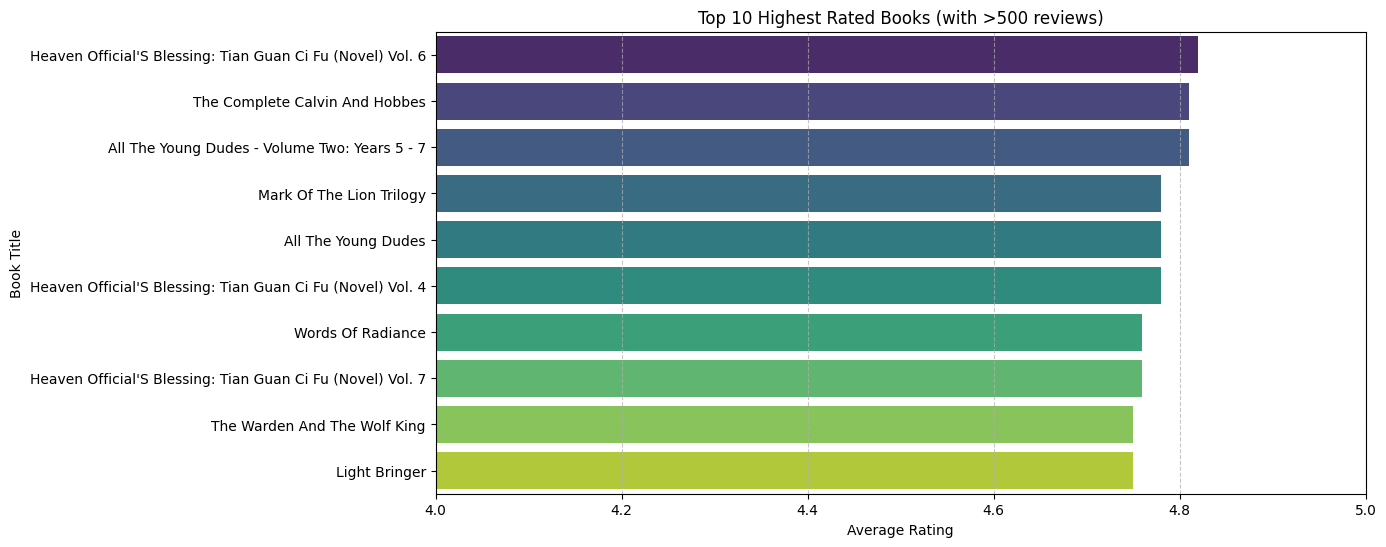

In [43]:
# Select top-rated books with a significant number of reviews (e.g., more than 500)
top_rated_books = df[df['num_reviews'] > 500].nlargest(10, 'average_rating')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated_books, x='average_rating', y='book_title', hue = "book_title", palette='viridis', legend = False)

plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.title('Top 10 Highest Rated Books (with >500 reviews)')
plt.xlim(4, 5)  # Ratings usually range from 1-5, so we limit the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Observations  
- 📌 *All books have high ratings*, mostly above 4.2.  
- 📌 *"Heaven Official’s Blessing" appears multiple times*, showing its strong popularity.  
- 📌 *There’s a mix of fiction, fantasy, and graphic novels*, indicating diverse reader preferences.  
- 📌 *The top-rated books have very close ratings (4.4 – 4.8)*, meaning they are all highly loved.  

This suggests that readers generally love these books, and they maintain consistently high ratings.

C:\Users\acer\AppData\Local\Temp\ipykernel_8236\15494385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top_reviewed_books, x='book_title', palette='mako')


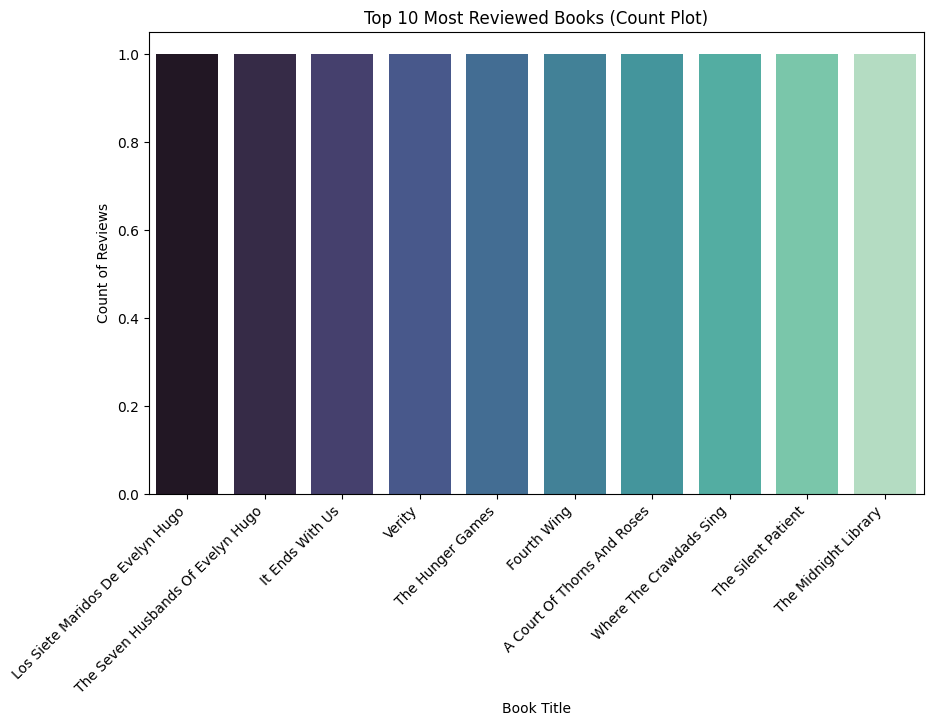

In [52]:
# Selecting the top 10 most reviewed books
top_reviewed_books = df.nlargest(10, 'num_reviews')

# Plotting the count of reviews for the top 10 books
plt.figure(figsize=(10, 6))
sns.countplot(data=top_reviewed_books, x='book_title', palette='mako')

# Customizing the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel("Book Title")
plt.ylabel("Count of Reviews")
plt.title("Top 10 Most Reviewed Books (Count Plot)")

# Show the plot
plt.show()

**Observation:**
- The top 10 most reviewed books in the dataset each show a review count of 1.0, indicating an equal number of reviews for all books. This uniformity suggests either that the dataset contains limited or incomplete review data, or that the review counts were not captured in sufficient detail. Further investigation into the dataset is needed to ensure the accuracy and completeness of the review information.



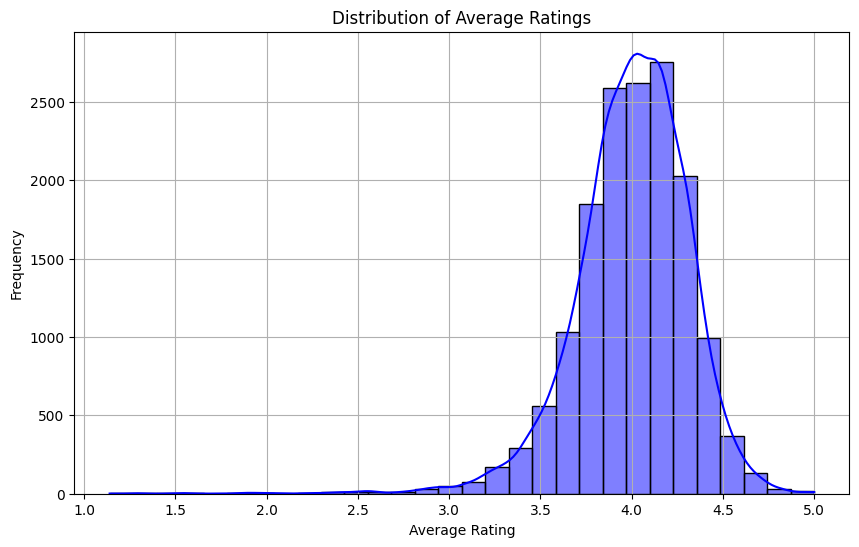

In [56]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'average_rating' column with 30 bins and a kernel density estimate (KDE) line
sns.histplot(df['average_rating'], bins=30, kde=True, color='blue')

# Add a title to the plot
plt.title('Distribution of Average Ratings')

# Label the x-axis
plt.xlabel('Average Rating')

# Label the y-axis
plt.ylabel('Frequency')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_8236\1944634422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='format', y='average_rating', palette='Set3')


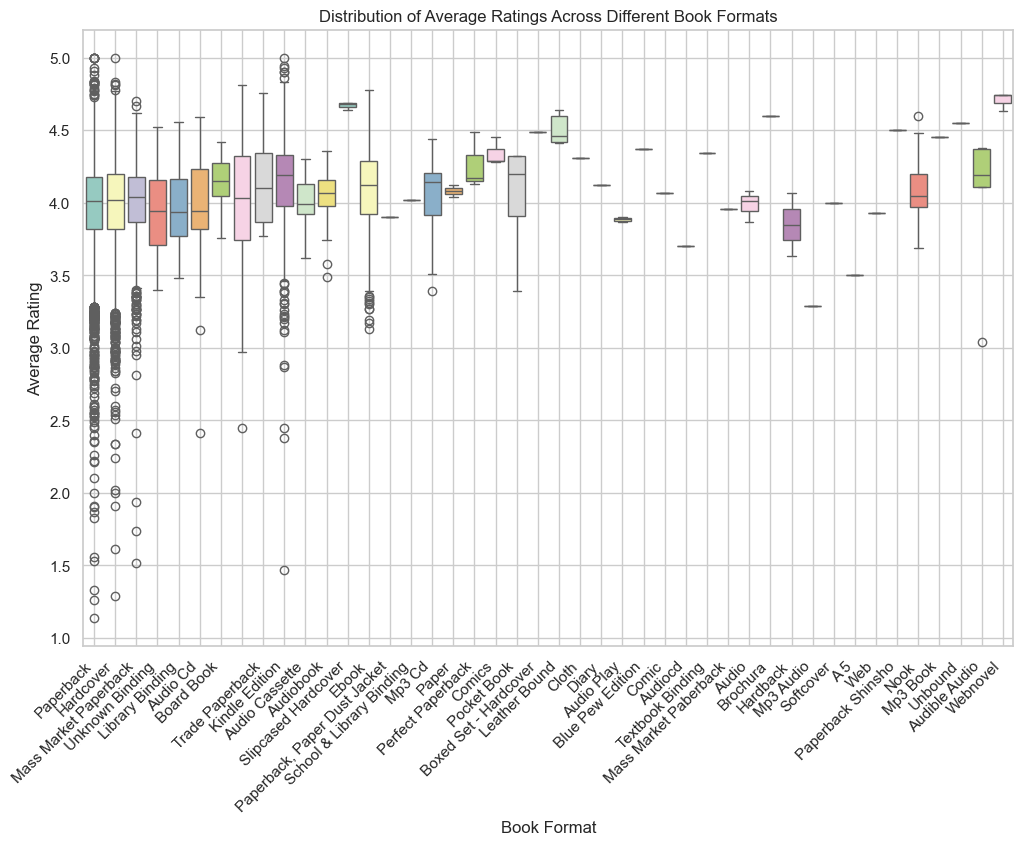

In [57]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plot a boxplot to visualize the distribution of average ratings across different book formats
sns.boxplot(data=df, x='format', y='average_rating', palette='Set3')

# Add a title to the plot
plt.title('Distribution of Average Ratings Across Different Book Formats')

# Label the x-axis
plt.xlabel('Book Format')

# Label the y-axis
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()